## Chapter 2. 데이터와 표본분포, Data and Sampling Distributions

Import required Python packages.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
DATA = './datasets'

Define paths to data sets.

In [3]:
LOANS_INCOME_CSV = DATA + '/' + 'loans_income.csv'
SP500_DATA_CSV = DATA + '/' + 'sp500_data.csv.gz'

Figure 2.1. 모집단과 표본

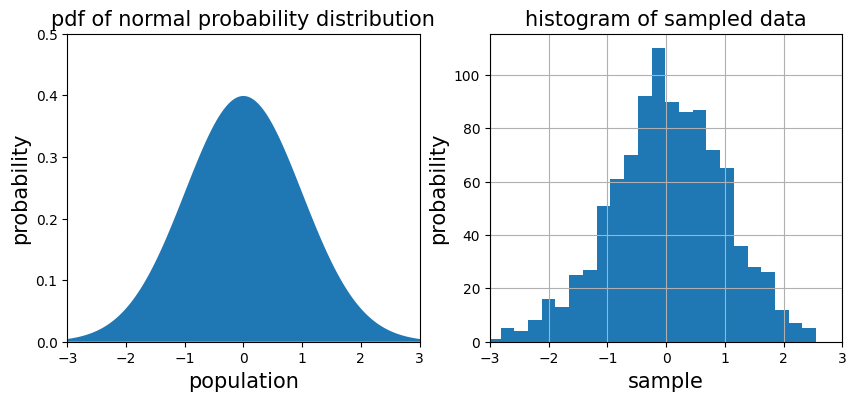

In [4]:
np.random.seed(seed=1)
x = np.linspace(-5, 5, 500)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# 정규분포 모집단의 pdf
pdf = stats.norm(loc=0, scale=1).pdf(x)

ax = axes[0]
ax.fill(x,pdf)
ax.set_title('pdf of normal probability distribution',fontsize=15)
ax.set_xlabel('population',fontsize=15)
ax.set_ylabel('probability',fontsize=15)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 0.5)
ax.grid(False)

# 정규분포 표본의 histogram
# norm.rvs() 함수는 정규확률분포로부터 난수를 생성, rvs <= random variates(임의변량)
xsample = stats.norm.rvs(size=1000)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_title('histogram of sampled data',fontsize=15)
ax.set_xlabel('sample',fontsize=15)
ax.set_ylabel('probability',fontsize=15)
ax.set_xlim(-3, 3)
ax.grid(True)

plt.show()

### 2.3 통계학에서의 표본분포, Sampling Distribution of a Statistic

In [5]:
pd.read_csv(LOANS_INCOME_CSV)

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [6]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
print(type(loans_income))
loans_income

<class 'pandas.core.series.Series'>


0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [7]:
loans_income.sample(1000)

40292     63000
38959     92000
17361    134000
33996     52000
26491     43000
          ...  
31345    110000
12399     60000
15        36000
9943      48000
41361     52942
Name: x, Length: 1000, dtype: int64

In [8]:
import pandas as pd
import seaborn as sns

smaple_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})
smaple_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
smaple_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})
results = pd.concat([smaple_data, smaple_mean_05, smaple_mean_20])
results

,income,type
33798,89000.00,Data
36591,80000.00,Data
36202,37500.00,Data
37792,56000.00,Data
32112,156000.00,Data
...,...,...
995,75054.00,Mean of 20
996,79831.55,Mean of 20
997,69985.40,Mean of 20
998,70359.20,Mean of 20


In [9]:
print(loans_income.mean())
print(results[results['type'] == 'Data']['income'].mean())
print(results[results['type'] == 'Mean of 5']['income'].mean())
print(results[results['type'] == 'Mean of 20']['income'].mean())

68760.51844
68778.692
68847.8078
68775.91695


c:\Users\user\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


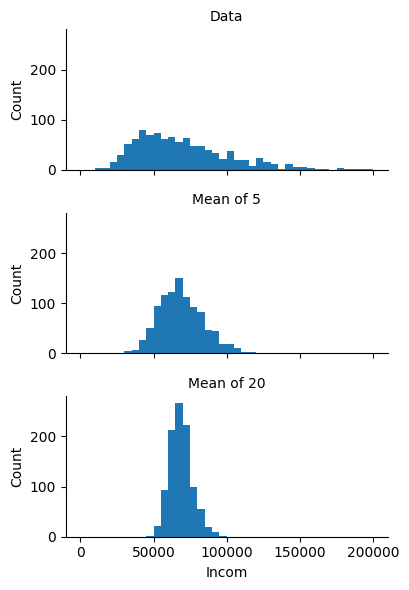

In [10]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Incom','Count')
g.set_titles('{col_name}')

### 2.4 부트스트랩, bootstrap

In [11]:
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [12]:
import matplotlib.pyplot as plt

def user_hist(data, bins, xlim, ylim, title, xlabel, ylabel, fontsize):
    plt.hist(data, bins)

    if len(xlim) == 2 : plt.xlim(xlim)
    if len(ylim) == 2 : plt.xlim(xlim)
    
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.show()

In [13]:
sample = resample(loans_income)
len(sample)

50000

unique: 3684
median: 62000.0


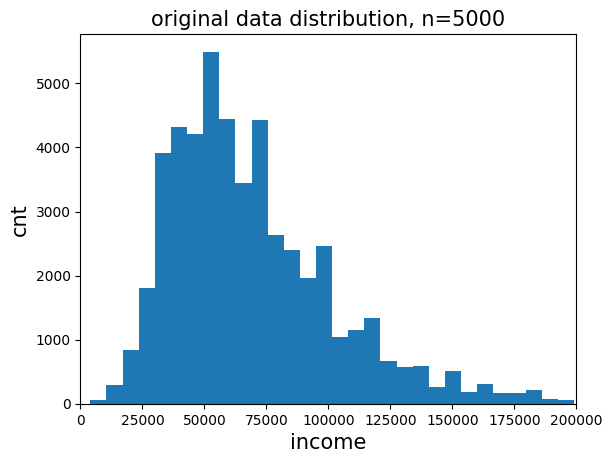

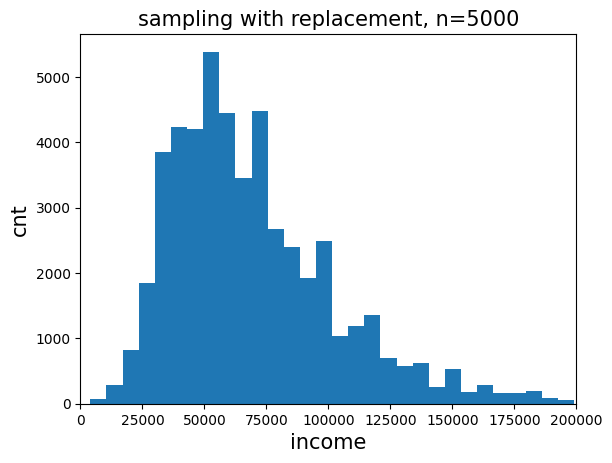

In [14]:
import matplotlib.pyplot as plt

sample = resample(loans_income)

print('unique:', len(sample.unique()))
print('median:', sample.median())

# 히스토그램
title = 'original data distribution, n=5000'
user_hist(loans_income, bins=30, xlim=[0,200000], ylim=[], title=title, xlabel='income', ylabel='cnt', fontsize=15)

title = 'sampling with replacement, n=5000'
user_hist(sample, bins=30, xlim=[0,200000], ylim=[], title=title, xlabel='income', ylabel='cnt', fontsize=15)

Bootstrap Statistics:
original mean: 62000.0
bootstrap mean: 61912.689
bias: -87.31100000000151
stadard error: 237.0956296868768


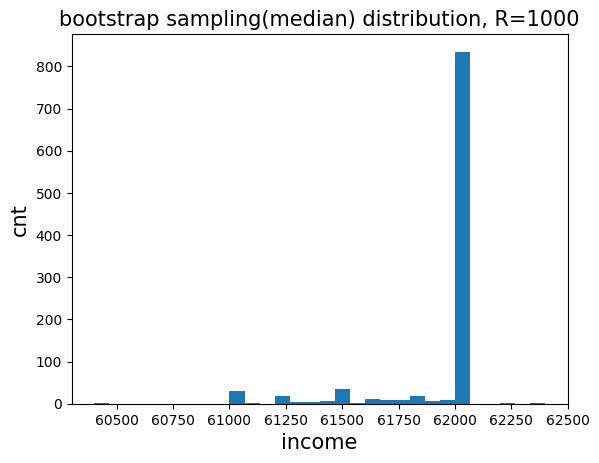

In [15]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original mean: {loans_income.median()}')
print(f'bootstrap mean: {results.mean()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'stadard error: {results.std()}')


# 히스토그램
title = "bootstrap sampling(median) distribution, R=1000"
user_hist(results, bins=30, xlim=[], ylim=[], title=title, xlabel='income', ylabel='cnt', fontsize=15)

### 2.5 신뢰구간, confidence intervals

68760.51844
55734.1


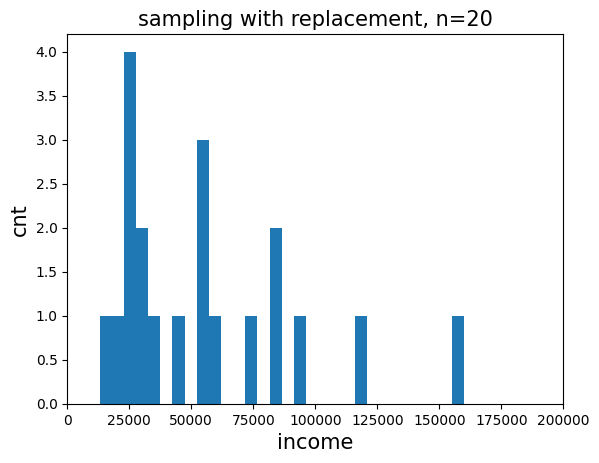

In [16]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

# 히스토그램
title = "sampling with replacement, n=20"
user_hist(sample20, bins=30, xlim=[0,200000], ylim=[], title=title, xlabel='income', ylabel='cnt', fontsize=15)

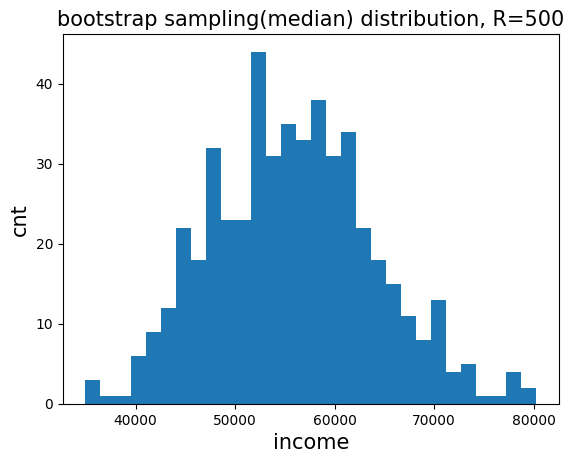

In [17]:
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

# 히스토그램
title = "bootstrap sampling(median) distribution, R=500"
user_hist(results, bins=30, xlim=[], ylim=[], title=title, xlabel='income', ylabel='cnt', fontsize=15)

[43212.45, 70233.43999999999]


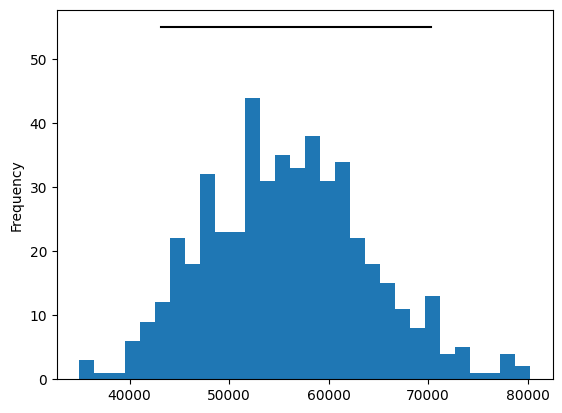

In [18]:
confidence_interval = list(results.quantile([0.05, 0.95]))
print(confidence_interval)
ax = results.plot.hist(bins=30)
ax.plot(confidence_interval, [55, 55], color='black')
plt.show()

[43212.45, 70233.43999999999]


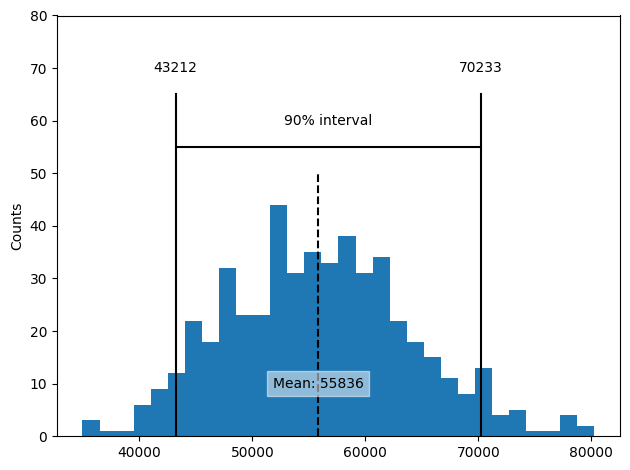

In [19]:
confidence_interval = list(results.quantile([0.05, 0.95]))
print(confidence_interval)
ax = results.plot.hist(bins=30)
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

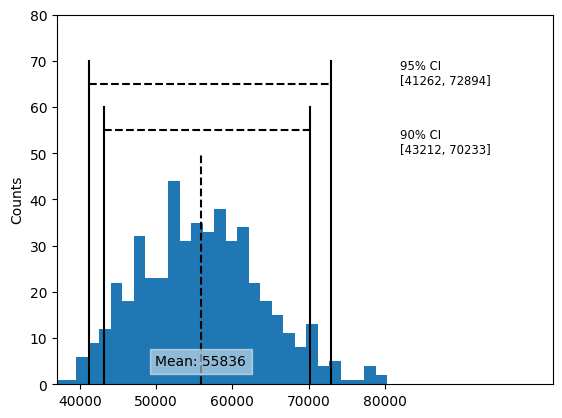

In [20]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30)
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

### 2.6 정규분포 Normal Distribution

#### Standard Normal and QQ-Plots

The package scipy has the function (scipy.stats.probplot) to create QQ-plots. 
The argument dist specifies the distribution, which is set by default to the normal distribution.  

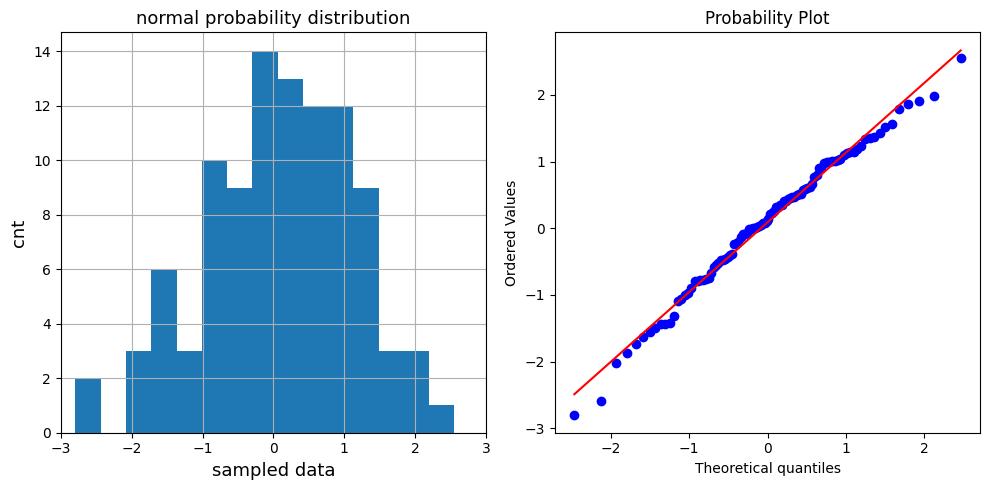

In [21]:
# 정규분포 샘플링
norm_sample = stats.norm(loc=0, scale=1).rvs(size=100)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ax = axes[0]
ax.hist(norm_sample,bins=15)
ax.set_title('normal probability distribution',fontsize=13)
ax.set_xlabel('sampled data',fontsize=13)
ax.set_ylabel('cnt',fontsize=13)
ax.set_xlim(-3, 3)
ax.grid(True)

ax = axes[1]
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

### 2.7 긴 꼬리 분포 Long-Tailed Distributions

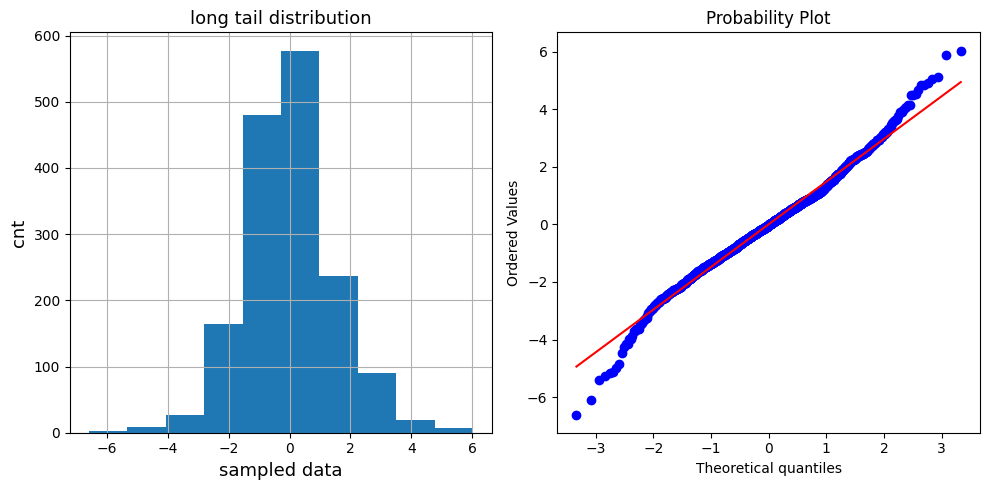

In [22]:
# 긴 꼬리 분포 샘플링
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ax = axes[0]
ax.hist(nflx)
ax.set_title('long tail distribution',fontsize=13)
ax.set_xlabel('sampled data',fontsize=13)
ax.set_ylabel('cnt',fontsize=13)
# ax.set_xlim(-3, 3)
ax.grid(True)

ax = axes[1]
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

### 2.8 이항분포 Binomial Distribution

In [23]:
# size가 5인 시행에서 각 시행의 성공확률이 p = 0.1일때 정확히 x=2인 성공이 나올 확률
print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


In [24]:
# 성공확률이 p = 0.1인 시행을 5번 했을 때, 2번 이하의 성공을 관찰할 확률
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


### 2.12 푸아송 분포와 그 외 관련 분포들, Poisson and Related Distribution

#### 2.12.1 푸아송 분포, poisson distribution

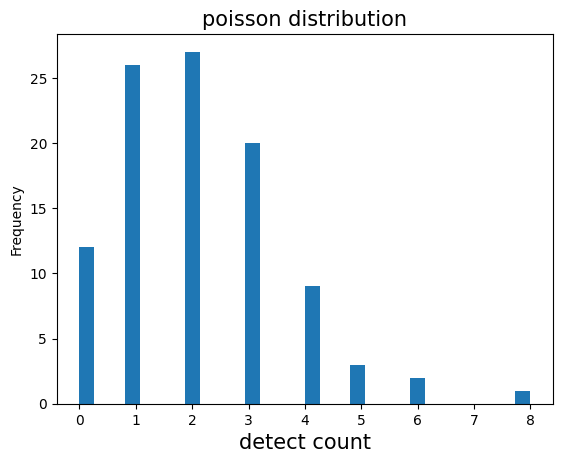

In [25]:
# 이 코드는 lambda = 2인 푸아송 분포에서 난수 100개를 생성한다.
# 예를 들어 고객서비스 센터에 1분당 평균 2회로 문의 전화가 접수된다면,
# 이 코드는 100분을 시뮬레이션하여 100분당 문의전화 횟수를 알려준다.
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist(bins=30)
plt.title('poisson distribution',fontsize=15)
plt.xlabel('detect count',fontsize=15)
plt.show()

#### 2.12.2 지수분포, Exponential Distribution

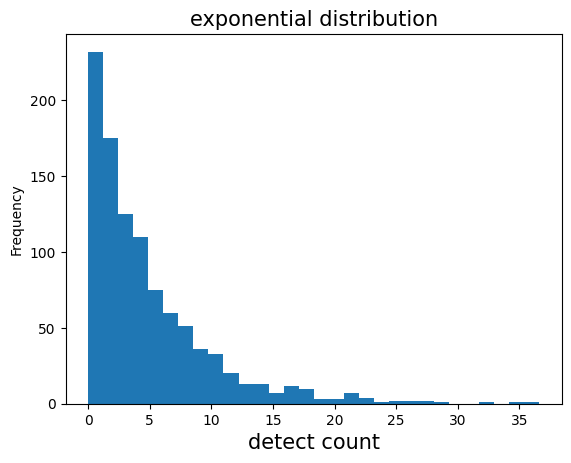

In [26]:
sample = stats.expon.rvs(scale=5, size=1000)

pd.Series(sample).plot.hist(bins=30)
plt.title('exponential distribution',fontsize=15)
plt.xlabel('detect count',fontsize=15)
plt.show()

#### 2.12.4 베이불 분포, Weibull Distribution

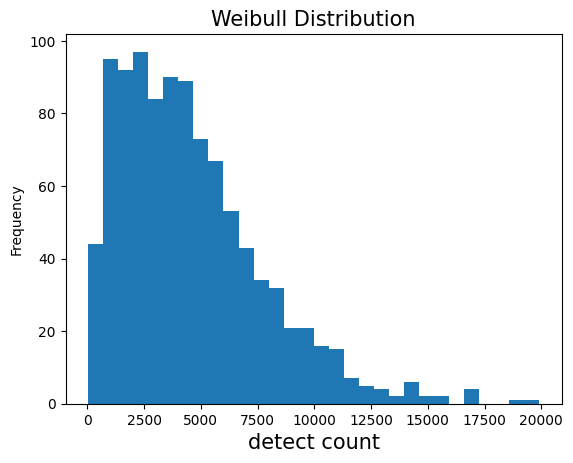

In [27]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=1000)
pd.Series(sample).plot.hist(bins=30)
plt.title('Weibull Distribution',fontsize=15)
plt.xlabel('detect count',fontsize=15)
plt.show()